# Introduction to Machine Learning

Last session we understood what an Exploratory Data Analysis is (EDA), and why do we perform it. Once the data is clean and ready for the model, the only step left is to train it. However, there is nuance to the process, and it is not as straightforward as it may seem.

## What is Machine Learning?

Machine Learning is the science behind computer algorithms that help machines learn from data without explicit programming.

![image](https://images.datacamp.com/image/upload/v1689699524/Comparing_different_industry_terms_9e8fa1a2ff.png)

### Types of ML

There are different types of Machine Learning algorithms depending on how your data looks and what is the objective of your algorithm. We can classify them in three different types:

- **Supervised learning**: what we want the model to predict, we give it to it during training. It will learn to predict those values by minimizing the error between its prediction and the actual value (ground truth).
Example: Spam filtering. We indicate to the algorithm which email messages are spam and which ones are not.
- **Unsupervised learning**: there is no specific value we want the model to predict. We give it the input data, and we ask of it to uncover hidden patterns and relationships that might be useful for us.
Example: Customer Segmentation in Marketing. We ask the model to create customer groups that might have similar needs. With that classification, companies are able to offer similar products to similar customers.
- **Reinforcement learning**: in this case, we have an agent that learns how to take actions in a specific environment to maximize a reward signal.
Example: robot navigating a maze. Each time the robots moves correctly, it receives a reward. If not, it receives a penalty. Slowly, it will learn what are the characteristics of the optimal path to get out of the maze.


## Data splitting

### Why?

As we already know, ML models learn from the data we show them. However, the objective of training a model is so that we can use it to predict correctly the output of some data it has never seen before. When the model is in production (its final stage, predicting for the client or whoever needs it), we can assess if it is performing correctly or not. But shouldn't we be able to assess that **before** it reaches that stage?

That is why we do not use all of our available data for training. We split it. We will show the model some of the data, and we will use the rest to see how it performs with data it has never seen before.

Data splitting is done to assess two different things:
- **Assess generalization**: we want to see how the model generalizes, how it performs with data it has never seen before, as we just said.
- **Prevent overfitting**: overfitting happens when the model performs very well with the data it has seen during the training, and not so good with the data is has not yet seen. This usually happens when the model is more complex than it needs to be. The model ends up **learning** all of the training data, but it is not capable of generalizing. To see if there is overfitting or not, we have to see how the model performs with data it has not seen.

![image](https://miro.medium.com/v2/resize:fit:1125/1*_7OPgojau8hkiPUiHoGK_w.png)



### How?

We need to make sure of two things:
- **The model sees enough data during training**. To ensure that the model is capable of learning what the true distribution of the data is, we have to show it a sample of data that represents faithfully the whole population.
- **We have enough data to see if it is capable of generalizing**. Just as with training, in the phase of testing we need another sample that would be representative enough of the population. In this case, is to avoid **high-variance** in the estimate of the model's performance.

We have to have enough samples in each split to ensure statistical significance.

So, how do we do the split?

We divide the data in three parts:
- **Training set**: the data the model sees during training, the data it learns from.
- **Validation set**: this is some data the model does not see during training, but we use it to tune the hyperparameters of the model between trainings, going from the architecture of the model itself to specific hyperparameters such as the learning rate, batch size, etc.
- **Test set**: we only use it once we consider all of our trainings are done. It is to provide an unbiased evaluation of the final model's performance on unseen data.

![image](https://www.brainstobytes.com/content/images/2020/01/Sets.png)

The percentages of data that go to each set depend on each project and how much total data you have. However, the most common splits are 60/20/20, 70/15/15 and 80/10/10.

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# Check how many instances there is
print(f"There are {len(housing)} instances")

There are 20640 instances


In [3]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The splitting can easily be done in code if your data has been loaded in a `pandas` DataFrame with `sklearn`.

In [4]:
from sklearn.model_selection import train_test_split

*Note: the Exploratory Data Analysis (EDA) is usually done only on the training set. All preprocessing done there is then repeated in the validation and test sets*.

## Choosing a model

The next step in the pipeline is to choose the model. To properly do this step, we have to do several things first:
- **Understand your data**: the EDA should be enough to complete this step. Once we have explored the data, we should be able to get a sense of what the relationships might be between the attributes of each sample and the value we want to predict. There are different types of data, and different models understand better different data types.
- **Define the problem clearly**: what are we doing? Regression? Classification? Clustering? The output of the model and how it comes to perdict using the input attributes shouls help us choose the right one.
- **Start simple**: if there are a bunch of models you can try with your data, start with the simplest ones first. The simpler the model, the easier it is to understand its decisions and the cheaper it is to train it.
- **Evaluate multiple models**: increase complexity and see how it affects the performance. You are not bound to your initial decision, try several.
- **Consider the context and constraints**: what do we want from the model? Speed? Accuracy? Interpretability? Choose accordingly.

## Training a model



Training, as we have already discussed, is the phase where we teach the model how to make better predictions by learning patters in the data. This is done by **adjusting internal parameters** so that the model gets better at matching the input data to the correct output.

**Loss function**. It is also called the objective function. In supervised learning, when the model predicts something, there will almost always be a difference between the prediction and the real value (label). How we define this difference is what we call the **loss function**. Depending on how we define it, the objective of the model will be to minimize it or maximize it. When we train the model, it is adjusting its internal parameters (also called weights) so that this function is minimized or maximized, depending on the objective.

![image](https://gbhat.com/assets/gifs/linear_regression.gif)


Training Model 1: Linear Regression with one feature
Training Model 2: Linear Regression with all features
Training Model 3: Random Forest Regressor


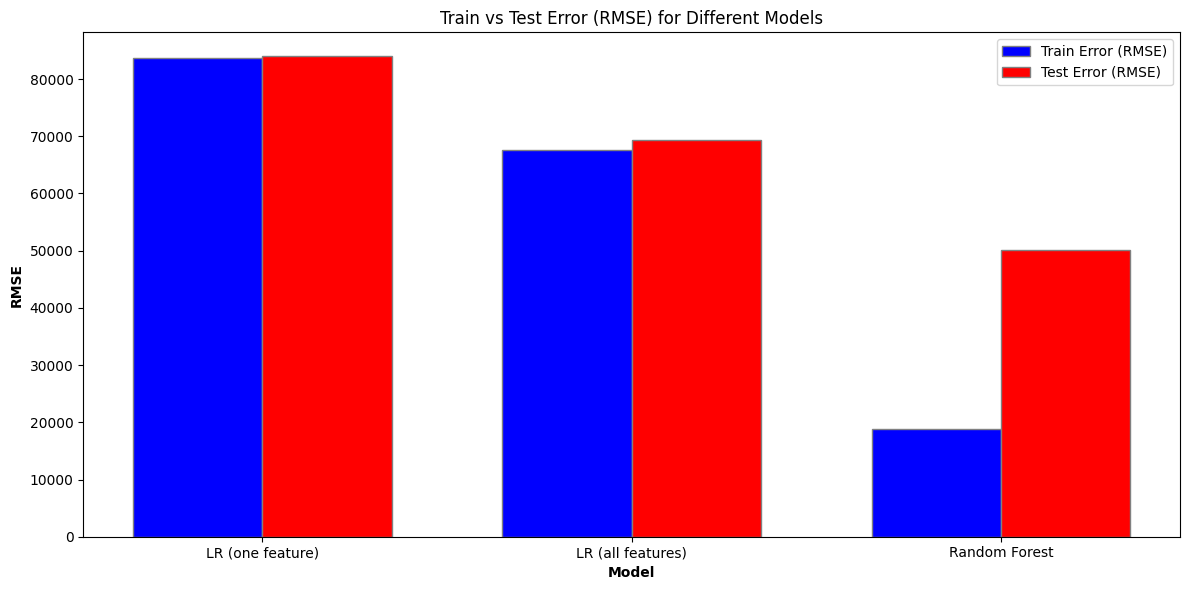

In [5]:


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing - Handle missing values and categorical features for simplicity
# For this example, we'll fill missing 'total_bedrooms' with the median
housing.dropna(subset=["total_bedrooms"], inplace=True)
housing = pd.get_dummies(housing, columns=['ocean_proximity'], drop_first=True)

# Split data (re-splitting after preprocessing)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_set, test_size=0.25, random_state=42) # 60% train, 20% val, 20% test

# Separate features and target variable
housing_labels = housing["median_house_value"]
housing_features = housing.drop("median_house_value", axis=1)

train_labels = train_set["median_house_value"]
train_features = train_set.drop("median_house_value", axis=1)

test_labels = test_set["median_house_value"]
test_features = test_set.drop("median_house_value", axis=1)

# Model 1: Linear Regression with one feature (e.g., 'median_income')
print("Training Model 1: Linear Regression with one feature")
lin_reg_one_feature = LinearRegression()
# Reshape the feature for training
lin_reg_one_feature.fit(train_features[['median_income']], train_labels)

# Model 2: Linear Regression with all features
print("Training Model 2: Linear Regression with all features")
lin_reg_all_features = LinearRegression()
lin_reg_all_features.fit(train_features, train_labels)

# Model 3: Random Forest Regressor
print("Training Model 3: Random Forest Regressor")
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_features, train_labels)


# Evaluate models and store errors
from sklearn.metrics import mean_squared_error

model_names = ['LR (one feature)', 'LR (all features)', 'Random Forest']
train_errors = {}
test_errors = {}

# Model 1
train_predictions = lin_reg_one_feature.predict(train_features[['median_income']])
test_predictions = lin_reg_one_feature.predict(test_features[['median_income']])
train_errors[model_names[0]] = np.sqrt(mean_squared_error(train_labels, train_predictions))
test_errors[model_names[0]] = np.sqrt(mean_squared_error(test_labels, test_predictions))

# Model 2
train_predictions = lin_reg_all_features.predict(train_features)
test_predictions = lin_reg_all_features.predict(test_features)
train_errors[model_names[1]] = np.sqrt(mean_squared_error(train_labels, train_predictions))
test_errors[model_names[1]] = np.sqrt(mean_squared_error(test_labels, test_predictions))

# Model 3
train_predictions = forest_reg.predict(train_features)
test_predictions = forest_reg.predict(test_features)
train_errors[model_names[2]] = np.sqrt(mean_squared_error(train_labels, train_predictions))
test_errors[model_names[2]] = np.sqrt(mean_squared_error(test_labels, test_predictions))


# Plot train and test error
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

plt.bar(r1, list(train_errors.values()), color='blue', width=bar_width, edgecolor='grey', label='Train Error (RMSE)')
plt.bar(r2, list(test_errors.values()), color='red', width=bar_width, edgecolor='grey', label='Test Error (RMSE)')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('RMSE', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names)
plt.title('Train vs Test Error (RMSE) for Different Models')
plt.legend()
plt.tight_layout()
plt.show()





Performing Cross-Validation...
CV for Model 1...
CV for Model 2...
CV for Model 3...


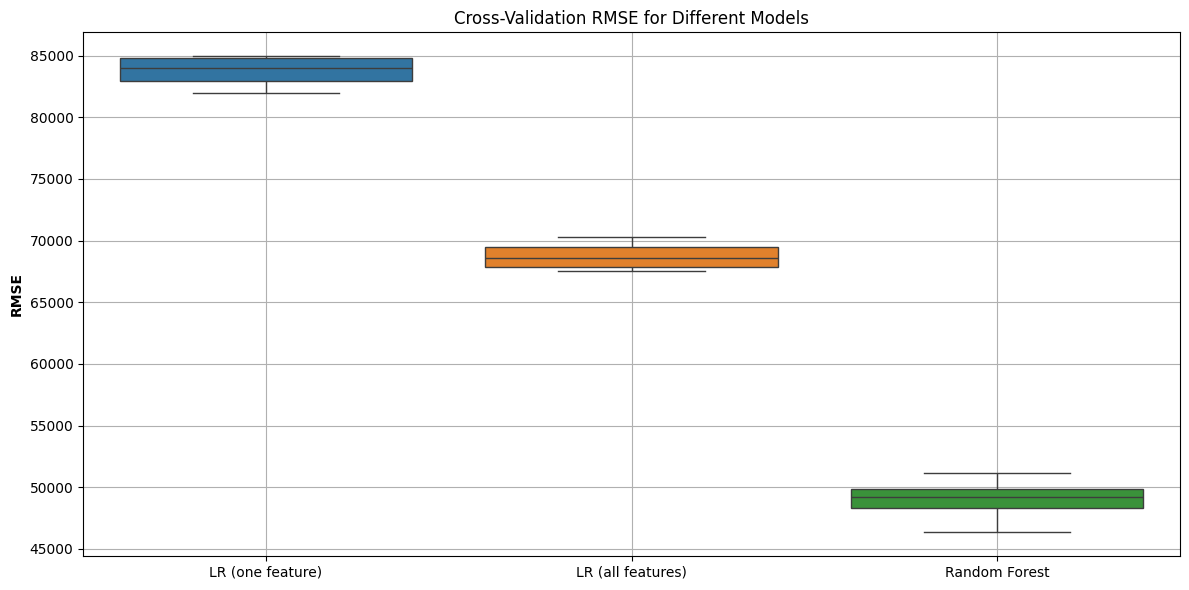


Cross-Validation RMSE Scores:
LR (one feature): Mean RMSE = 83746.7096, Std Dev = 1220.8022
LR (all features): Mean RMSE = 68746.3458, Std Dev = 1084.6799
Random Forest: Mean RMSE = 48984.1946, Std Dev = 1719.9293


In [7]:
# Perform Cross-Validation
print("\nPerforming Cross-Validation...")
cv_scores = {}

# Model 1
print("CV for Model 1...")
scores = cross_val_score(lin_reg_one_feature, housing_features[['median_income']], housing_labels, scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
cv_scores[model_names[0]] = rmse_scores

# Model 2
print("CV for Model 2...")
scores = cross_val_score(lin_reg_all_features, housing_features, housing_labels, scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
cv_scores[model_names[1]] = rmse_scores

# Model 3
print("CV for Model 3...")
scores = cross_val_score(forest_reg, housing_features, housing_labels, scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
cv_scores[model_names[2]] = rmse_scores




# Plot boxplot of cross-validation scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(cv_scores))
plt.ylabel('RMSE', fontweight='bold')
plt.title('Cross-Validation RMSE for Different Models')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print mean and standard deviation of CV scores
print("\nCross-Validation RMSE Scores:")
for model, scores in cv_scores.items():
    print(f"{model}: Mean RMSE = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")



Analyzing SHAP values for Random Forest...


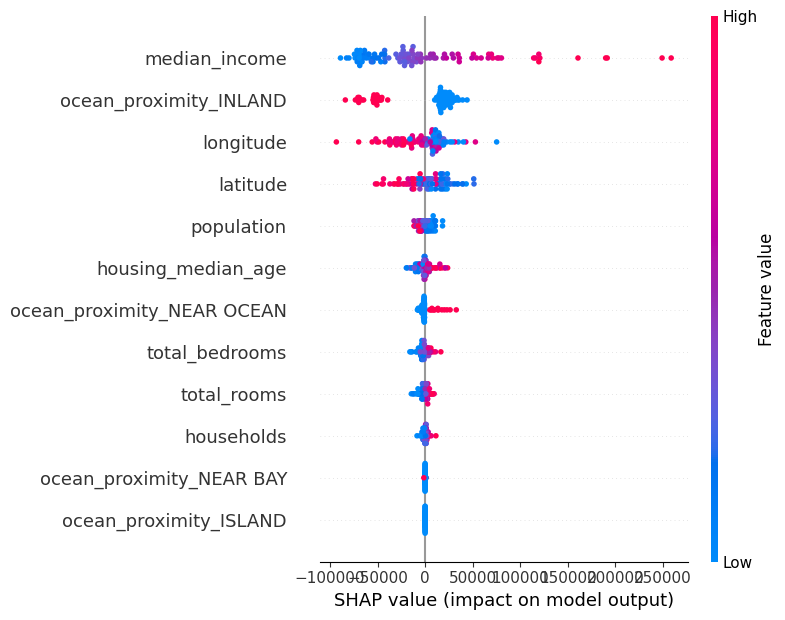

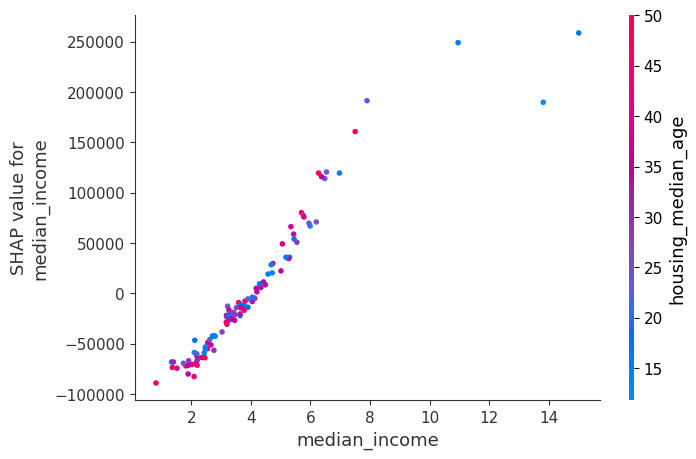

In [11]:

import shap

# Explain the Random Forest model's predictions using SHAP
print("\nAnalyzing SHAP values for Random Forest...")

# Select a subset of the test data for faster SHAP calculation
X_test_subset = test_features.sample(n=100, random_state=42)

# Create a SHAP Explainer object
# For tree-based models, TreeExplainer is generally the fastest and most accurate
explainer = shap.TreeExplainer(forest_reg)

# Calculate SHAP values for the subset of the test data
shap_values = explainer.shap_values(X_test_subset)

# Visualize the SHAP values

# Summary plot: shows the impact of each feature on the model output
# Each point on the plot is a single prediction. The x-axis is the SHAP value for that feature,
# and the color represents the feature value (red is high, blue is low).
shap.summary_plot(shap_values, X_test_subset)

# Dependence plot: shows how the SHAP value for a single feature changes across the dataset.
# It helps to understand the relationship between the feature value and its impact on the prediction.
# For example, let's look at 'median_income'
shap.dependence_plot("median_income", shap_values, X_test_subset)

# You can generate dependence plots for other features as well
# shap.dependence_plot("latitude", shap_values, X_test_subset)
# shap.dependence_plot("longitude", shap_values, X_test_subset)

# Force plot: shows the contribution of each feature to a single prediction.
# This requires an expected value (baseline) which TreeExplainer calculates.
# Let's visualize the first prediction in the subset
shap.initjs() # Initialize JavaScript for interactive plots
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_subset.iloc[0,:])


Feature Importance (Random Forest):


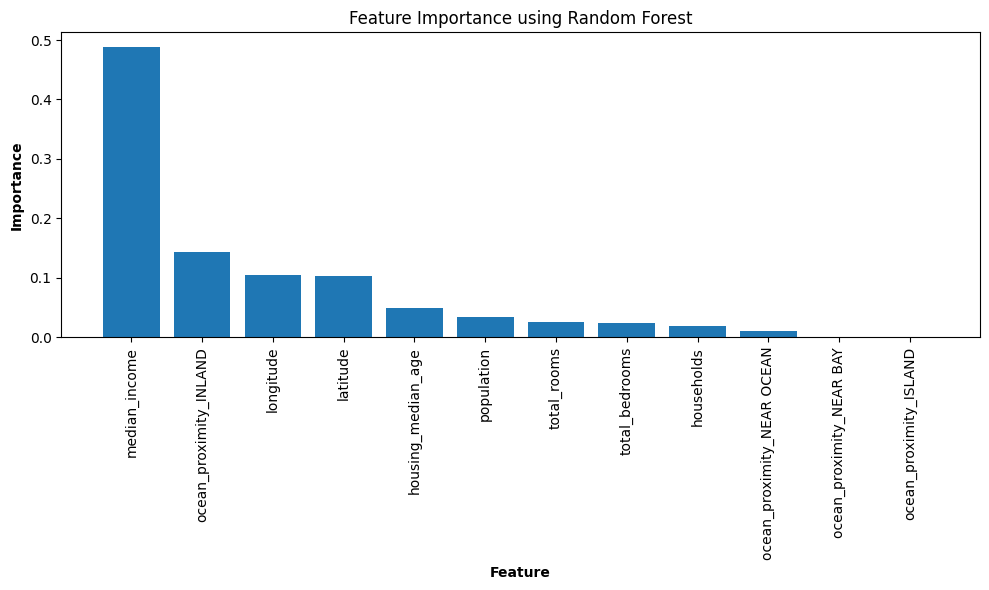


Feature Importance using SHAP:


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Feature Importance using Random Forest
print("\nFeature Importance (Random Forest):")
feature_importances = forest_reg.feature_importances_
feature_names = train_features.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importance using Random Forest')
plt.tight_layout()
plt.show()

# Feature Importance using SHAP (SHapley Additive exPlanations)
# Install shap if not already installed
!pip install shap

import shap

print("\nFeature Importance using SHAP:")

# Create a SHAP explainer
explainer = shap.Explainer(forest_reg)

# Select a subset of the training data for faster calculation (optional)
# Using the full training set can be computationally expensive
shap_values = explainer(train_features)

# Plot summary plot (shows impact of each feature on the model output)
shap.summary_plot(shap_values, train_features, plot_type="bar")

# Plot summary plot with individual data points
shap.summary_plot(shap_values, train_features)